**Zadanie 4 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Cel ćwiczenia:** Przetestowanie algorytmu kosztu złożoności

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math as mt
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn import tree

Wczytanie danych, nazwanie column według schematu, separacja obiektu pandas.Series z etykietami

In [2]:
data = pd.read_csv('C:\\Users\\mwasi\\Jupyter notebooks\\LSED\\lsed\\wine.txt', sep=",", header=None)
data.columns = 'Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,\
Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'.split(',') 

In [3]:
data.head()

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
labels = data['Label']
data.drop(columns=['Label'], inplace=True)
data.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

Utworzenie pełnego drzewa na pełnym zbiorze danych

In [5]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(data, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

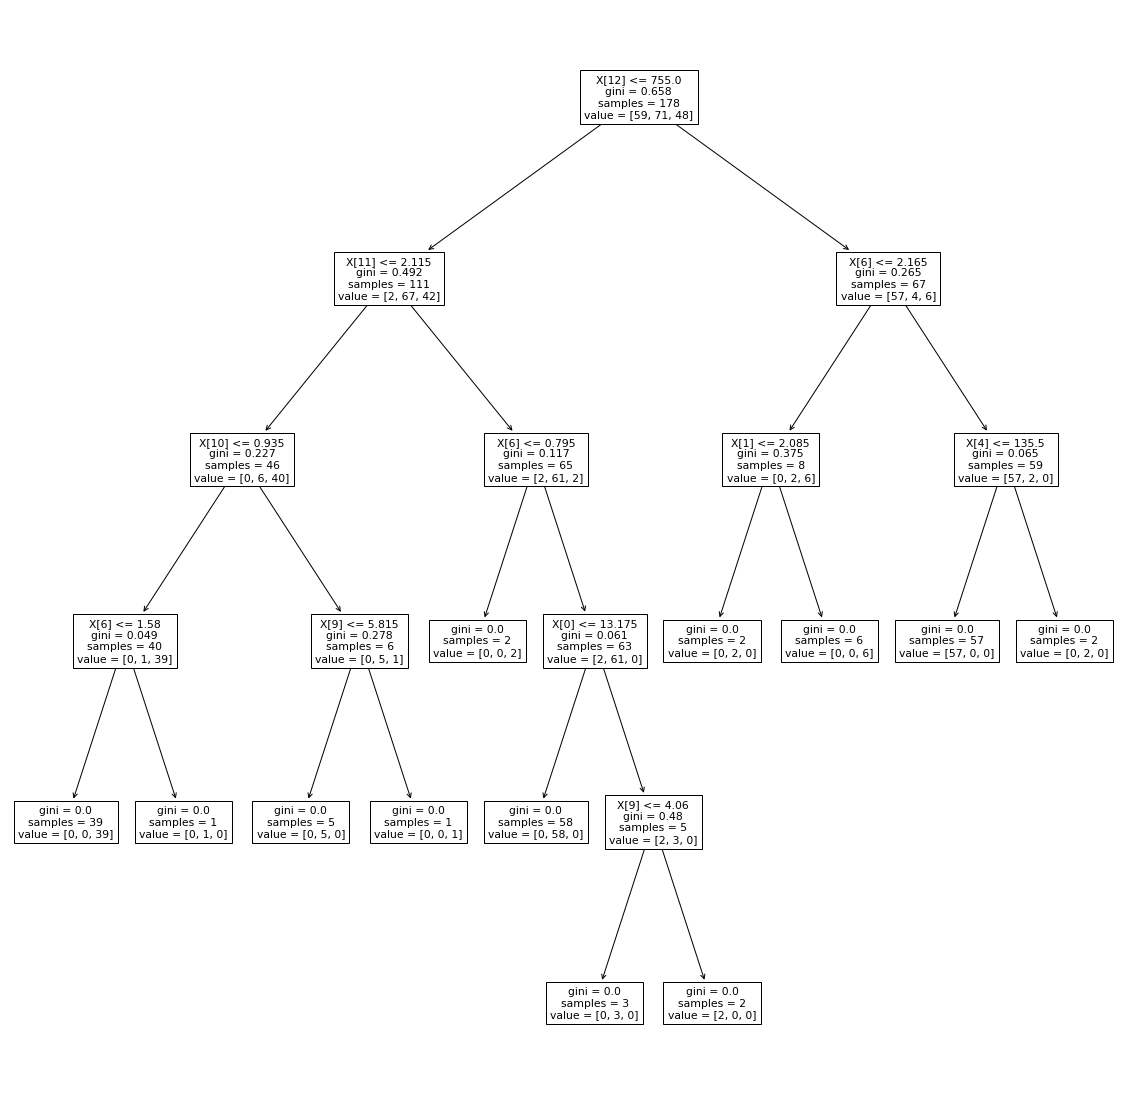

In [27]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf);

In [28]:
print(f'Skuteczność klasyfikatora dla podwójnego podstawienia: {clf.score(data, labels)}')

Skuteczność klasyfikatora dla podwójnego podstawienia: 1.0


In [32]:
cv_results = cross_validate(clf, data, labels, cv=10, n_jobs=5)
print(f"Średnia skuteczność klasyfikatora otrzymana metodą walidacji krzyżowej: {np.mean(cv_results['test_score'])}")

Średnia skuteczność klasyfikatora otrzymana metodą walidacji krzyżowej: 0.8705882352941178


Użycie algorytmu kosztu-złożoności na pełnym zbiorze danych:

In [9]:
path = clf.cost_complexity_pruning_path(data, labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
results = []
stds = []
for ccp_alpha in ccp_alphas:
    tmp= tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    cv_results = cross_validate(tmp, data, labels, cv=10, n_jobs=5)
    results.append(np.mean(cv_results['test_score']))
    stds.append(np.std(cv_results['test_score']))


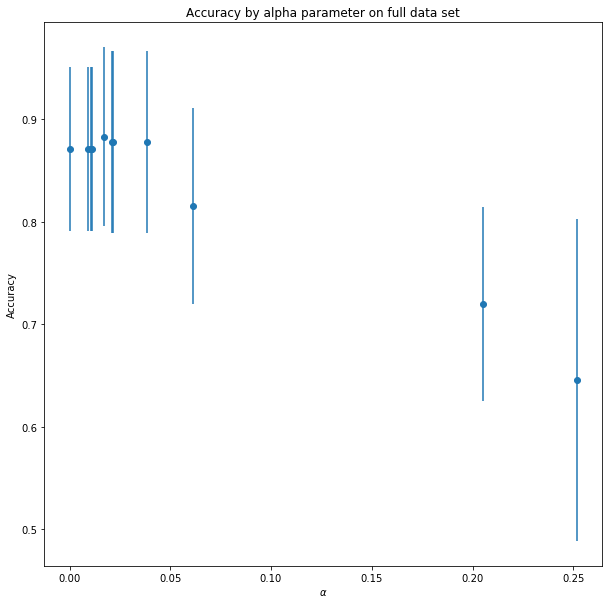

In [33]:
plt.figure(figsize=(10,10))
plt.title('Accuracy by alpha parameter on full data set')
plt.ylabel('Accuracy')
plt.xlabel(r'$\alpha$')
plt.errorbar(ccp_alphas, results, yerr=stds, linestyle=None, fmt='o');

Optymalną wartość parametru alfa wyznaczono jako punkt znajdujący się w obszarze maksimum otrzymanej dokładności powiększonego o wartość odchylenia standardowego (w tym przypadku wybrano trzecią największą wartość alfa).

Poniżej wytrenowano drzewo decyzyjne z wybraną wartością alfa oraz przedstawiono je na rysunku:

In [12]:
optimal_clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[-3])
optimal_clf.fit(data, labels)

DecisionTreeClassifier(ccp_alpha=0.06105020507820828, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

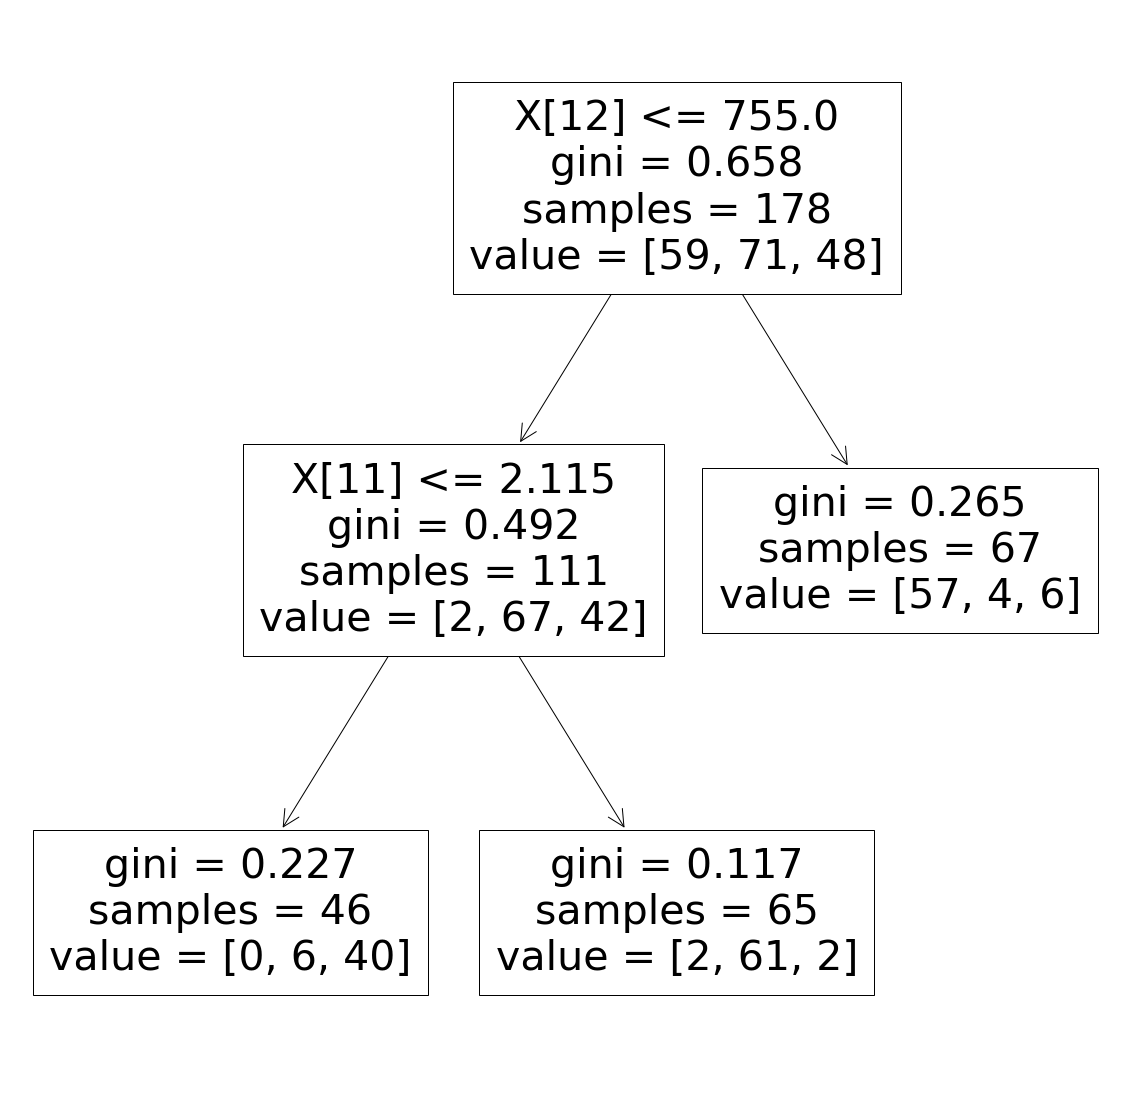

In [13]:
plt.figure(figsize=(20,20))
tree.plot_tree(optimal_clf);

In [34]:
print(f'Skuteczność klasyfikatora dla podwójnego podstawienia: {optimal_clf.score(data, labels)}')

Skuteczność klasyfikatora dla podwójnego podstawienia: 0.8876404494382022


In [35]:
cv_results = cross_validate(optimal_clf, data, labels, cv=10, n_jobs=5)
print(f"Średnia skuteczność klasyfikatora otrzymana metodą walidacji krzyżowej: {np.mean(cv_results['test_score'])}")

Średnia skuteczność klasyfikatora otrzymana metodą walidacji krzyżowej: 0.815686274509804


Następnym krokiem było znalezienie optymalnych drzew decyzyjnych, używając jedynie kolejno jednej, dwóch, trzech itd. pierwszych kolumn zbioru danych. Procedurę wyboru parametrów przeprowadzono analogicznie do zastosowanej dla pełnego zbioru.

In [16]:
def check_on_cut_data(data, labels, n_attributes, plot=True):
    results = []
    stds = []
    path = clf.cost_complexity_pruning_path(data.iloc[:, :n_attributes], labels)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    for ccp_alpha in ccp_alphas:
        tmp = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        cv_results = cross_validate(tmp, data.iloc[:, :n_attributes], labels, cv=5, n_jobs=5)
        results.append(np.mean(cv_results['test_score']))
        stds.append(np.std(cv_results['test_score']))
    if plot:
        plt.figure(figsize=(10,10))
        plt.title(f'Accuracy by alpha for {n_attributes} first attributes')
        plt.xlabel(r'$\alpha$')
        plt.ylabel('Accuracy')
        plt.errorbar(ccp_alphas, results, yerr=stds, linestyle=None, fmt='o')
    return results, stds, ccp_alphas

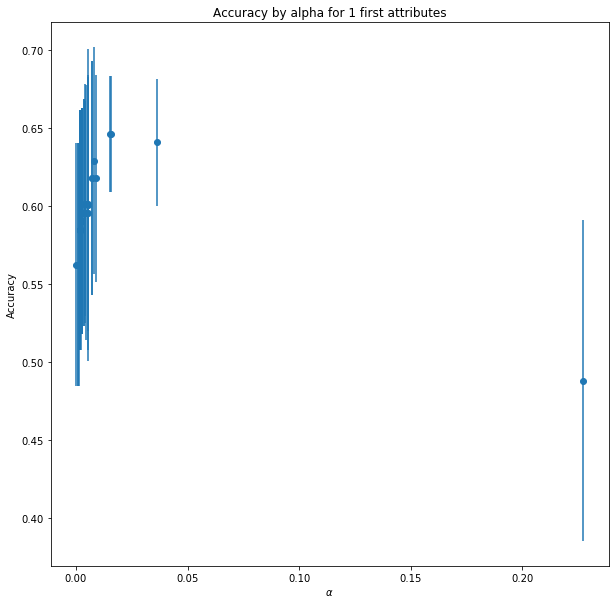

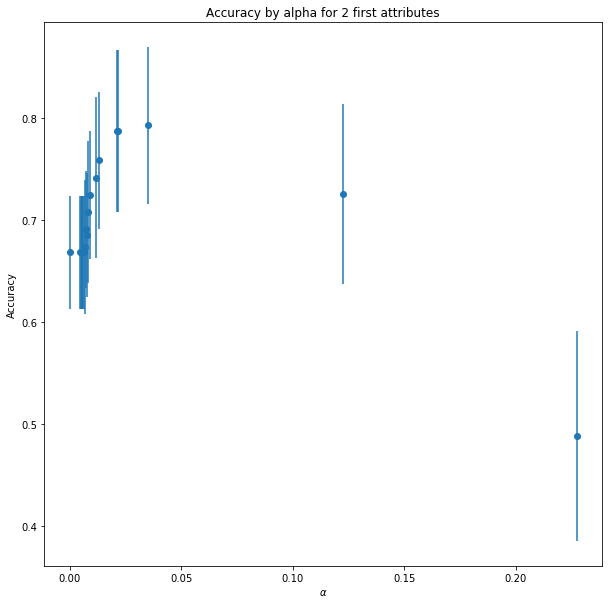

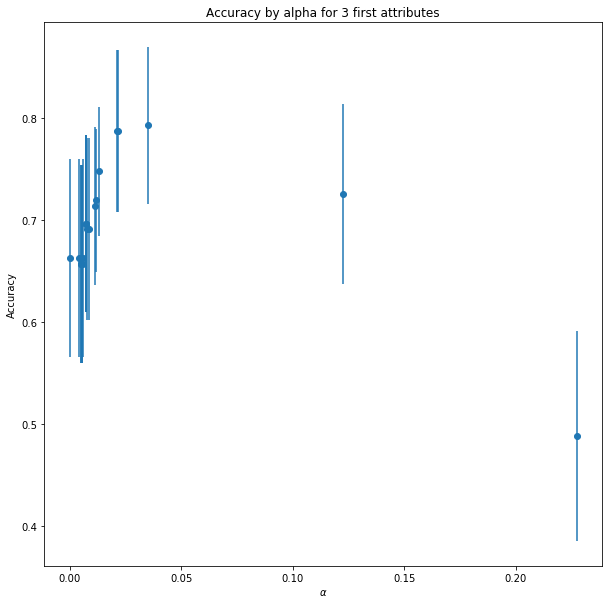

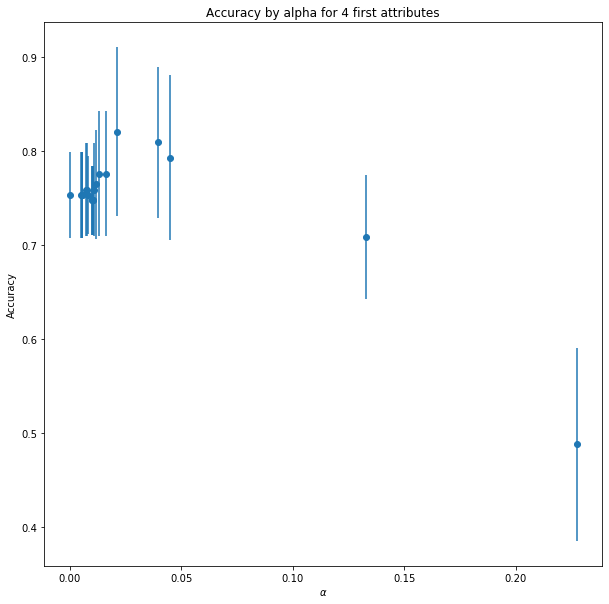

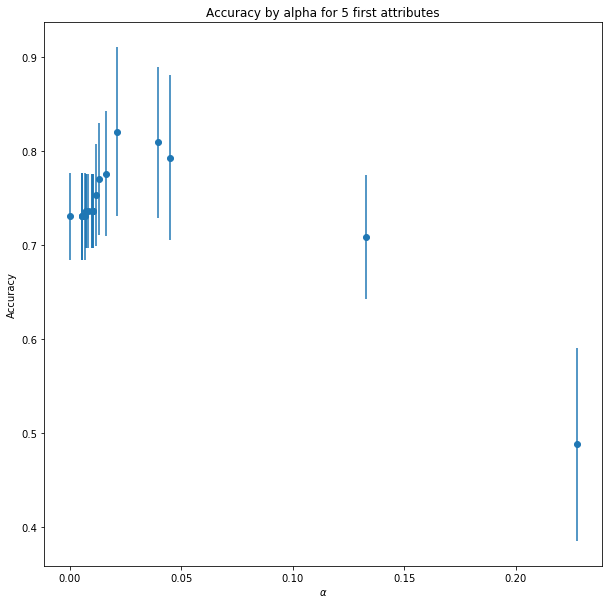

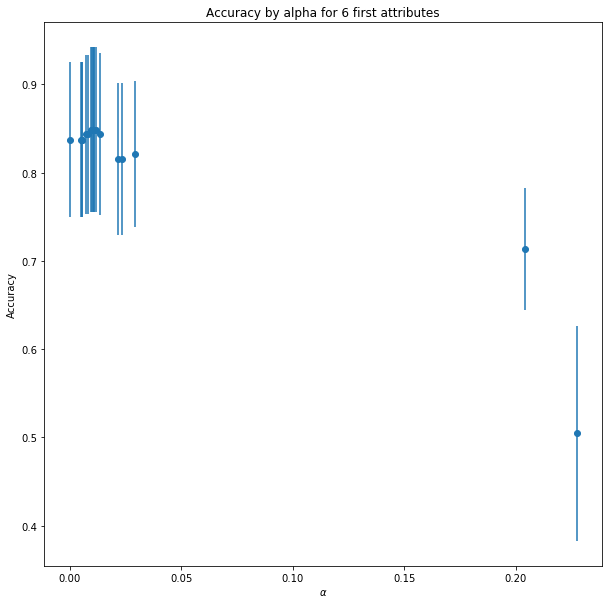

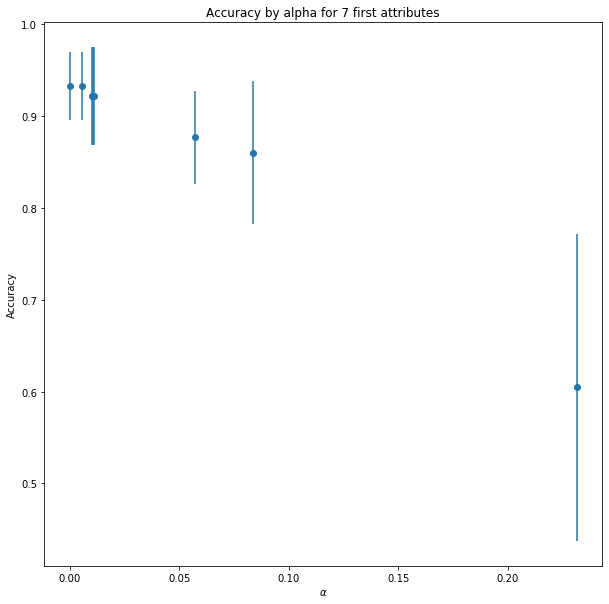

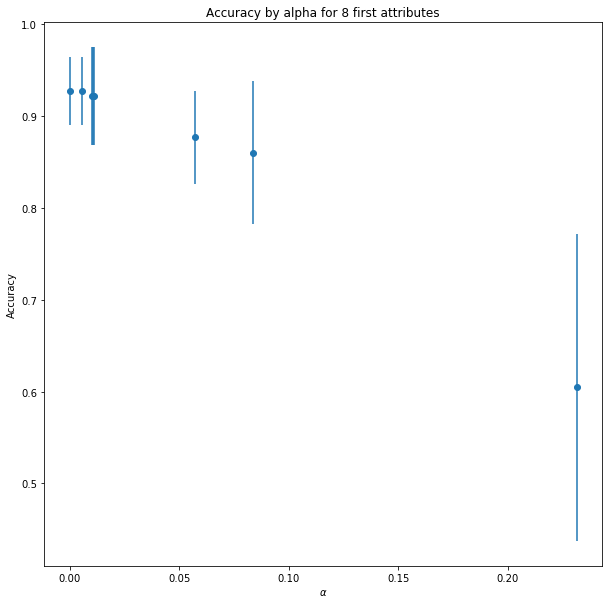

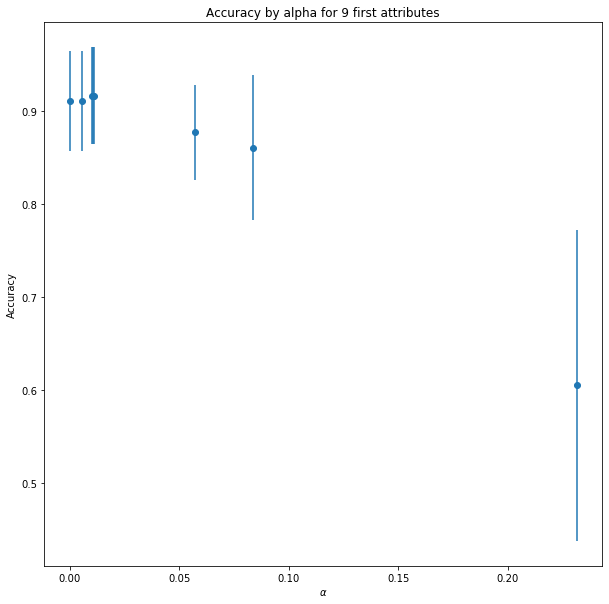

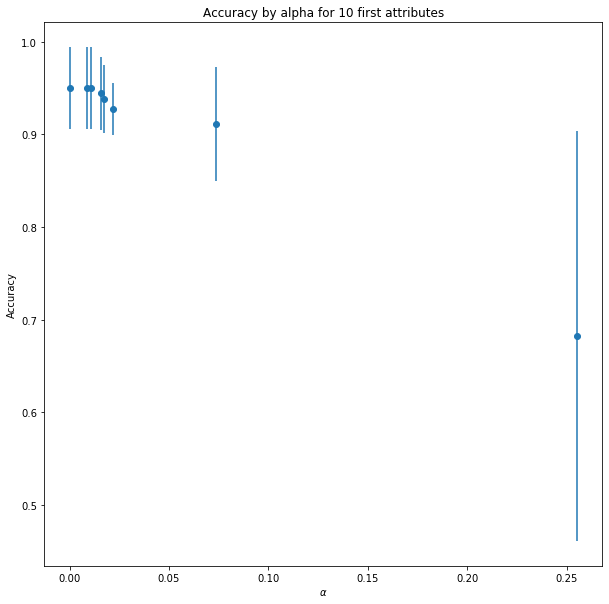

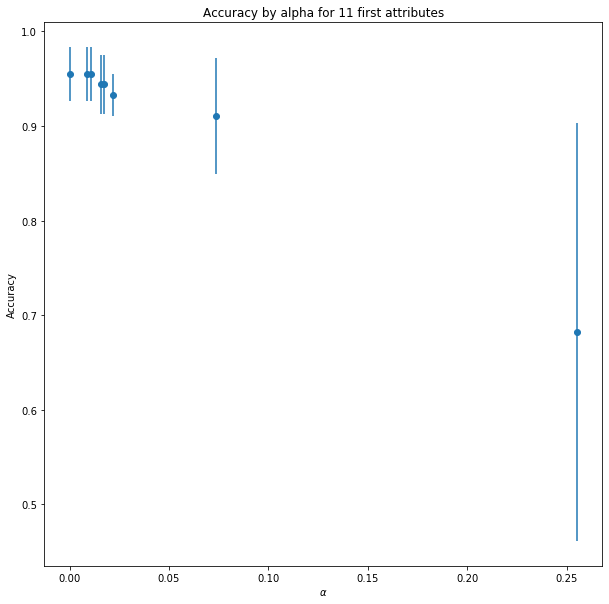

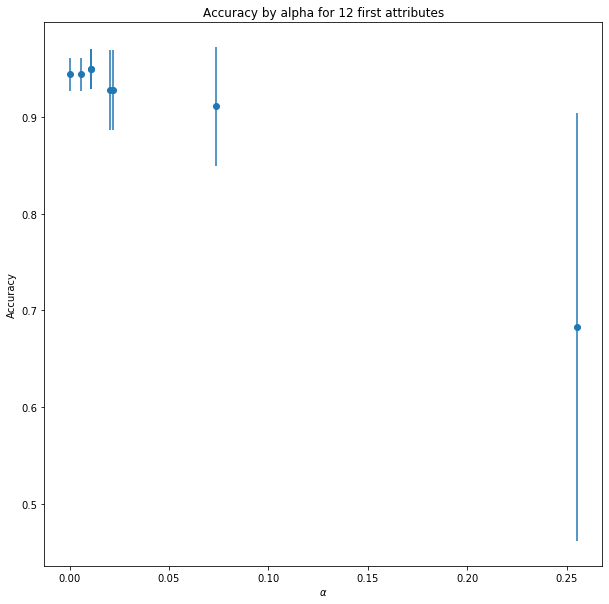

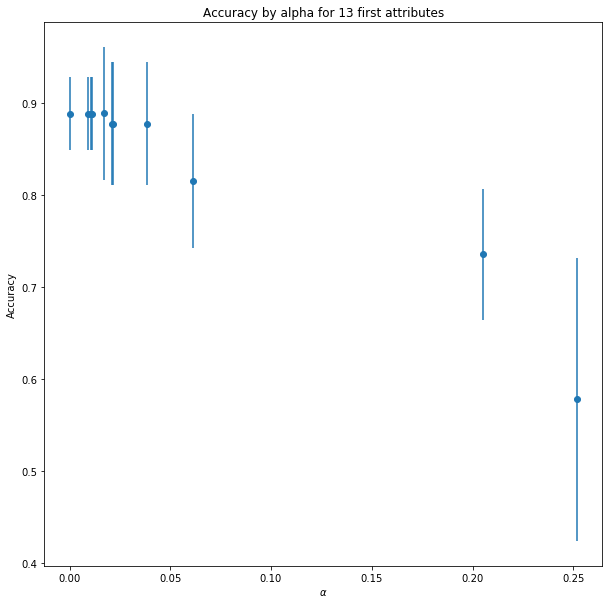

In [17]:
att_alphas = dict()
for index, _ in enumerate(data.columns, 1):
     _, _, alphas = check_on_cut_data(data, labels, index)
     att_alphas[index] = alphas

In [18]:
optimal_alphas = {1:att_alphas[1][-2], 2:att_alphas[2][-2], 3:att_alphas[3][-2], \
                  4:att_alphas[4][-3], 5:att_alphas[5][-3], 6:att_alphas[6][-3], \
                  7:att_alphas[7][-4], 8:att_alphas[8][-4], 9:att_alphas[9][-2], \
                  10:att_alphas[10][-2], 11:att_alphas[11][-3], 12:att_alphas[12][-3], 13:att_alphas[13][-3]}

In [44]:
print(f'Wartości parametru alfa dla poszczególnych liczb atrybutów: {optimal_alphas}')

Wartości parametru alfa dla poszczególnych liczb atrybutów: {1: 0.03634764288781672, 2: 0.1222982794819229, 3: 0.1222982794819229, 4: 0.04481596009190193, 5: 0.04481596009190193, 6: 0.029140993113446936, 7: 0.01094027202838556, 8: 0.01094027202838556, 9: 0.08370229074822264, 10: 0.07339004382174104, 11: 0.021683422038241678, 12: 0.021683422038241678, 13: 0.06105020507820828}


Dla poszczególnych liczb użytych atrybutów obliczono i wykreślono dokładność oraz różnicę rozmiaru drzewa pełnego i optymalnego.

In [23]:
summary_results = []
summary_stds = []
depth_differences = []

for index in optimal_alphas:
    tmp = tree.DecisionTreeClassifier(random_state=0)
    tmp.fit(data.iloc[:, :index], labels)
    depth = tmp.get_depth()
    tmp = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alphas[index])
    tmp.fit(data.iloc[:, :index], labels)
    depth_differences.append(depth-tmp.get_depth())
    cv_results = cross_validate(tmp, data.iloc[:, :index], labels, cv=5, n_jobs=5)
    summary_results.append(np.mean(cv_results['test_score']))
    summary_stds.append(np.std(cv_results['test_score']))    

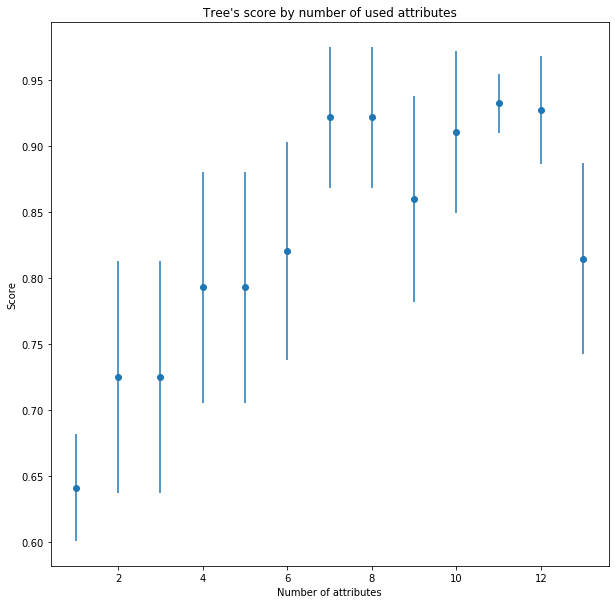

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Tree\'s score by number of used attributes')
plt.xlabel('Number of attributes')
plt.ylabel('Score')
plt.errorbar(range(1, 14, 1), summary_results, yerr=summary_stds, linestyle=None, fmt='o');

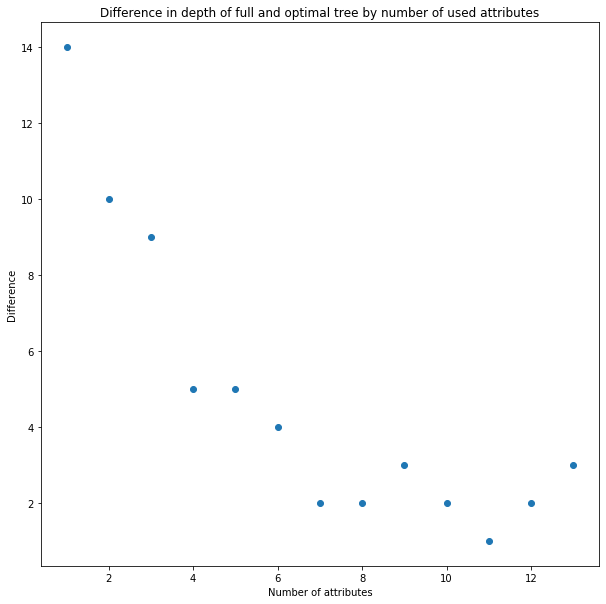

In [26]:
plt.figure(figsize=(10, 10))
plt.title('Difference in depth of full and optimal tree by number of used attributes')
plt.xlabel('Number of attributes')
plt.ylabel('Difference')
plt.scatter(range(1, 14, 1), depth_differences);

Obserwacje:
1. Dokładność klasyfikacji z użyciem pełnego drzewa liczona przez podwójne podstawienie wynosi 1, lecz ten wynik spada wyraźnie przy walidacji krzyżowej. Świadczy to o przetrenowaniu klasyfkatora.
2. Drzewo optymalne na pełnym zbiorze danych osiąga wyniki słabsze o kilka/kilkanaście procent (w zależności od metody obliczenia), ale jest znacznie mniejsze, a więc proces klasyfikacji jest szybszy.
3. Skuteczność klasyfikatora silnie zależy od liczby użytych atrybutów zbioru danych. Biorąc pod uwagę dolne granice niepewności, najwyższej dokładności klasyfikacji można oczekiwać używając 11 pierwszych atrybutów.
4. Im większa liczba atrybutów, tym mniej malał rozmiar drzewa w wyniku przycinania. Najmniejszą różnicę zaobserwowano dla 11 pierwszych atrybutów - tego samego przypadku, który określono jako dający najwyższą dokładność.